In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib as mp
import matplotlib.pyplot as plt
import os

In [2]:
# load in a shapefile
map_df = gpd.read_file("Resources/States_GIS/states.dbf")
map_df = map_df[map_df.STATE_NAME !='District of Columbia']

# import main CSV
df = pd.read_csv("Resources/deaths_per.csv", header=0)
# import Percentage of deaths CSV
percentage_df = pd.read_csv("Resources/deaths_summary_data.csv", header=0)
# import GDP Data
gdp_df = pd.read_csv("Resources/GDP.csv", header=0)

# 50 states merge datasets
merged =map_df.set_index('STATE_NAME').join(df.set_index("US State Name"))
mergedP =map_df.set_index('STATE_NAME').join(percentage_df.set_index('State'))
mergedGDP =map_df.set_index('STATE_NAME').join(gdp_df.set_index('State'))

# remove Alaska and Hawaii
map_df = map_df[map_df.STATE_NAME !='Alaska']                
map_df = map_df[map_df.STATE_NAME !='Hawaii']

# 48 states merge datasets
merged48 =map_df.set_index('STATE_NAME').join(df.set_index("US State Name"))
mergedP48 =map_df.set_index('STATE_NAME').join(percentage_df.set_index('State'))
mergedGDP48 =map_df.set_index('STATE_NAME').join(gdp_df.set_index('State'))

In [3]:
def create_map (title,data,column,scale,color='bwr',scale_label='Per 100,000 people'):
    """  
    title = string 
    data = merged,mergedP,merged48,mergdP48
    column = name of column to graph
    color = 
    
    
    """
    
    # set the range for the choropleth
    vmin, vmax = scale 
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 5))
    ax.axis('off')
    ax.set_title(title, 
                 fontdict={
                     'fontsize': '18', 
                     'fontweight' : '3'})
    data.plot(
        column = column, 
        cmap=color, 
        linewidth=0.8, 
        ax=ax, 
        edgecolor='0.8')
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

    cbar.set_label(scale_label)

    # create an annotation for the data source
    ax.annotate('Source: HealthData.gov, 2009-2018',xy=(0.1, .08),
                xycoords='figure fraction', horizontalalignment='left', 
                verticalalignment='top', fontsize=12, color='#555555')

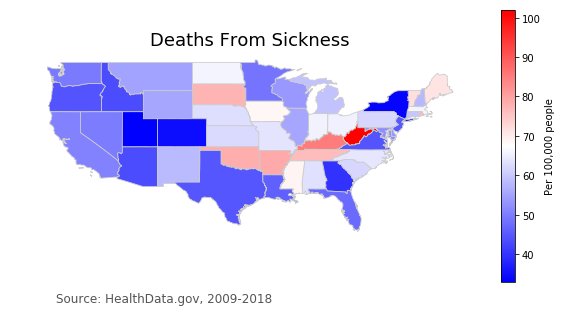

In [19]:
# map showing deaths from sickness

create_map(title = 'Deaths From Sickness',
           data = merged48,
           column = 'yearly_sick_deaths_per 1000',
           scale = [102,33])

plt.savefig('Deaths_From_Sickness.png')

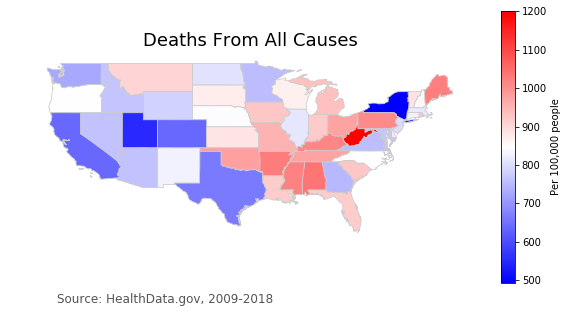

In [18]:
# map showing deaths from all causes

create_map(title = 'Deaths From All Causes',
           data = merged48,
           column = 'yearly_all_deaths_per_1000',
           scale = [1201,494])

plt.savefig('Deaths_From_All_Causes.png')

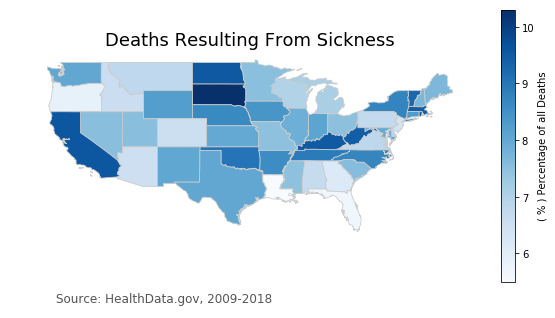

In [17]:
# map showing the percentage of deaths from sickness

create_map(title = 'Deaths Resulting From Sickness',
           data = mergedP48,
           column ='Pecent of deaths due to pneumonia or influenza',
           color = 'Blues',
           scale = [5.5,10.3],
           scale_label= '( % ) Percentage of all Deaths')

plt.savefig('Deaths_Resulting_From_Sickness.png')

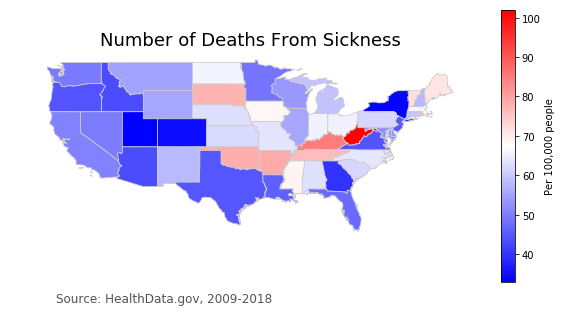

In [7]:

create_map(title = 'Number of Deaths From Sickness',
           data = merged48,
           column ='yearly_sick_deaths_per 1000',
           scale = [102,33])


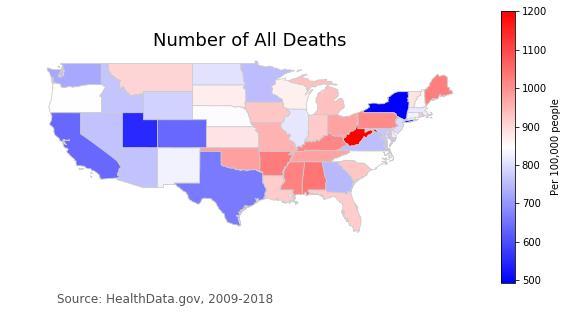

In [8]:

create_map(title = 'Number of All Deaths',
           data = merged48,
           column ='yearly_all_deaths_per_1000',
           scale = [1201,494])


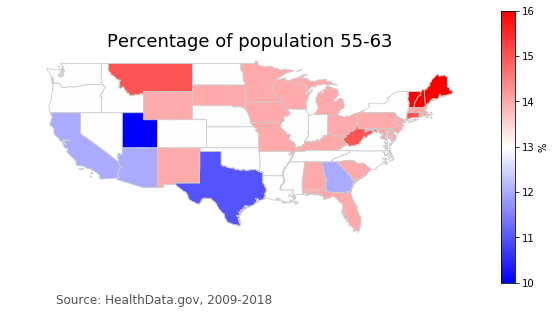

In [9]:

create_map(title = 'Percentage of population 55-63',
           data = merged48,
           column ='Adults 55-64',
           scale = [16,10],
           scale_label= '%')


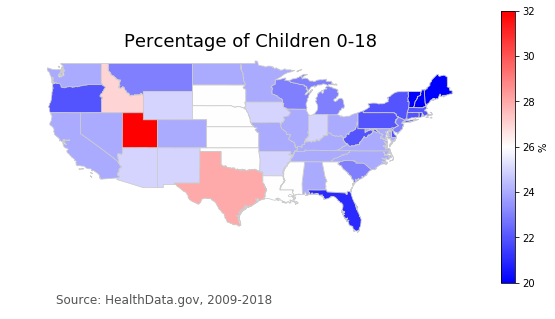

In [10]:

create_map(title = 'Percentage of Children 0-18',
           data = merged48,
           column ='Children 0-18',
           scale = [32,20],
           scale_label= '%')


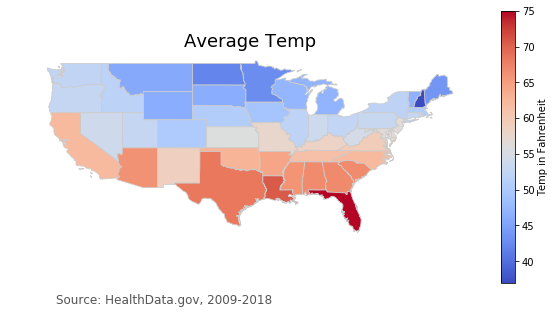

In [11]:

create_map(title = 'Average Temp',
           data = merged48,
           column ='Avg_temp',
           scale = [75,37],
           color = 'coolwarm',
           scale_label= 'Temp in Fahrenheit')


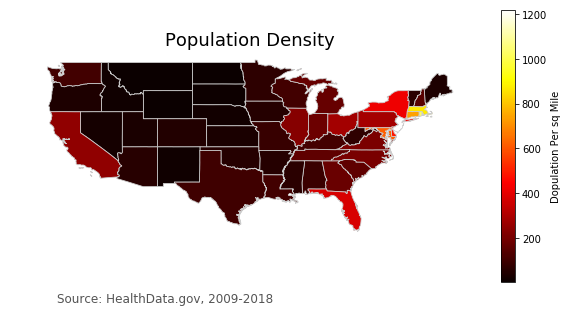

In [12]:

create_map(title = 'Population Density',
           data = merged48,
           column ='Density (Pop./ mi2)',
           scale = [1218,6],
           color = 'hot',
           scale_label= 'Dopulation Per sq Mile')

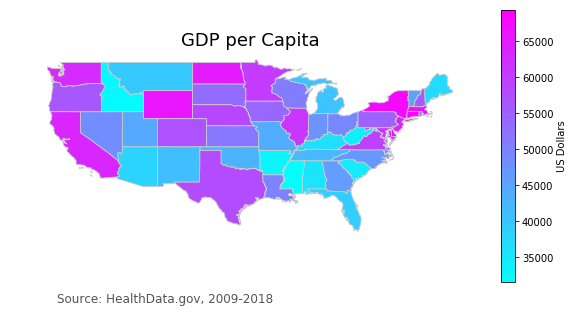

In [13]:


create_map(title = 'GDP per Capita',
           data = mergedGDP48,
           column ='GDP per capita',
           scale = [69300,31656],
           color = 'cool',
           scale_label= 'US Dollars')

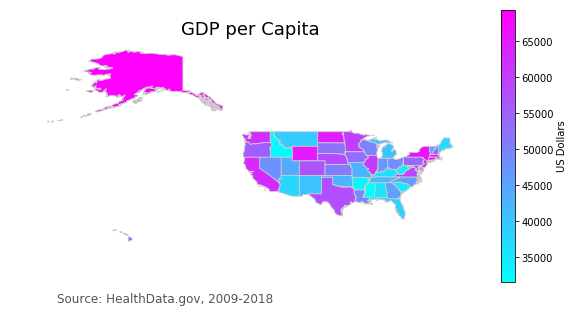

In [14]:
create_map(title = 'GDP per Capita',
           data = mergedGDP,
           column ='GDP per capita',
           scale = [69300,31656],
           color = 'cool',
           scale_label= 'US Dollars')